In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
t = np.linspace(0,10, 200)
x = np.exp(-t**2) * np.exp(1j * 2 * np.pi * t)
y = np.cosh(t)

/home/dani2442/Projects/Functional-Data-Analysis/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/dani2442/Projects/Functional-Data-Analysis/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


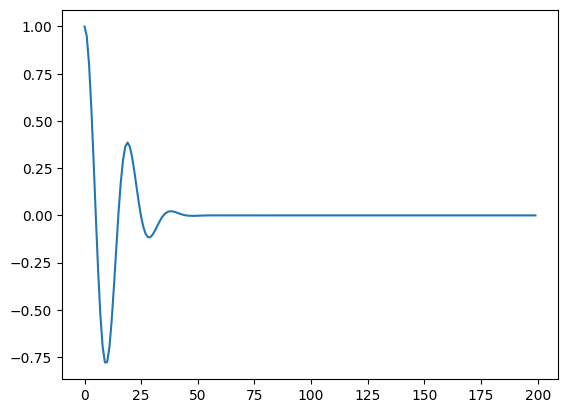

In [24]:
plt.plot(x)

In [25]:
x3 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(x)))

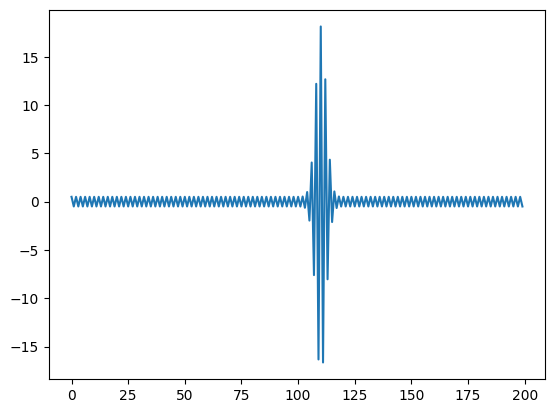

In [26]:
plt.plot(x3.real)

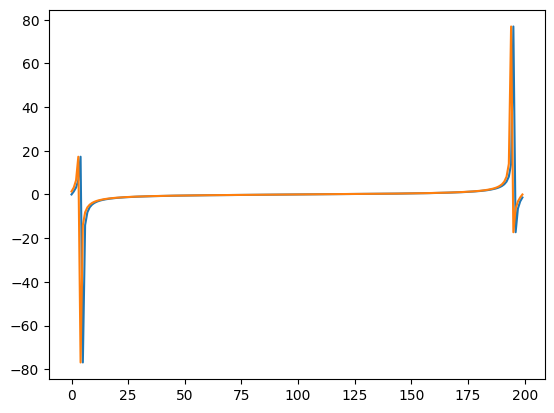

In [22]:
x1 = np.fft.fft(np.conjugate(x))
x2 = np.flip(np.conjugate(np.fft.fft(x)))

plt.plot(x1.imag)
plt.plot(x2.imag)

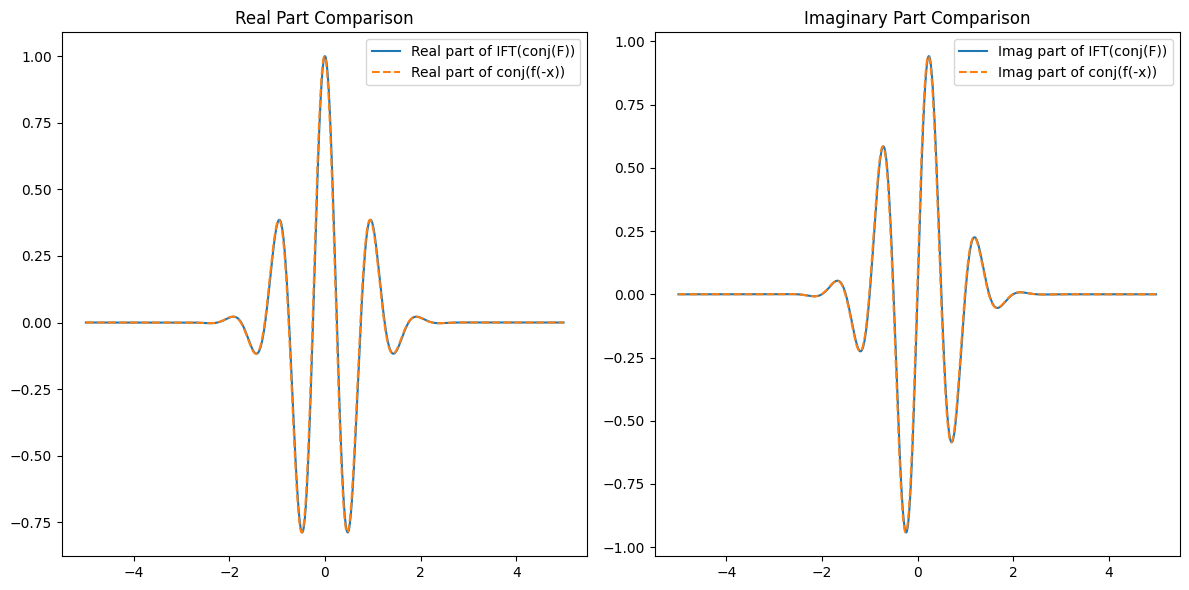

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x-axis
N = 1024  # Number of points
L = 10    # Domain length
x = np.linspace(-L/2, L/2, N, endpoint=False)
dx = x[1] - x[0]

# Define a function f(x), say a Gaussian with a phase shift
f = np.exp(-x**2) * np.exp(1j * 2 * np.pi * x)

# Compute its Fourier transform using numpy.fft
f_hat = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f))) * dx  # scaled for proper integration
xi = np.fft.fftshift(np.fft.fftfreq(N, d=dx))  # frequency axis

# Take the complex conjugate of the Fourier transform
f_hat_conj = np.conj(f_hat)

# Inverse Fourier transform of the conjugate
f_from_conj = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(f_hat_conj))) * N / L  # scaling back

# Compute f*(-x)
f_conj_flip = np.conj(np.flip(f))

# Plotting to compare
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, f_from_conj.real, label="Real part of IFT(conj(F))")
plt.plot(x, f_conj_flip.real, '--', label="Real part of conj(f(-x))")
plt.title("Real Part Comparison")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, f_from_conj.imag, label="Imag part of IFT(conj(F))")
plt.plot(x, f_conj_flip.imag, '--', label="Imag part of conj(f(-x))")
plt.title("Imaginary Part Comparison")
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
np.fft.fft(x) * np.fft.fft(y) - np.fft.fft(np.convolve(x, y, mode="same"))

array([ 6424966.09931834+0.00000000e+00j,
       18116973.38082454+9.73229305e+06j,
       -4211165.35910039-2.20845362e+06j,
       -1377122.35336618-1.33096295e+06j,
        -164200.85483805+3.35981379e+05j,
        -197971.86291861+7.09526522e+04j,
         -53650.2102295 +3.40307586e+05j,
         -80099.45525478+2.08384918e+05j,
         -40084.61955795+2.85417354e+05j,
         -54620.49512803+2.11781035e+05j,
         -38068.15728772+2.39113661e+05j,
         -46757.98366686+1.93402204e+05j,
         -38096.66166293+2.03728263e+05j,
         -43762.23539653+1.73035111e+05j,
         -38495.62133985+1.76547207e+05j,
         -42450.86856399+1.54697218e+05j,
         -38908.15994185+1.55217359e+05j,
         -41818.52875284+1.38950189e+05j,
         -39260.80960714+1.38096832e+05j,
         -41491.7250022 +1.25551561e+05j,
         -39547.85699345+1.24069295e+05j,
         -41314.21033082+1.14115664e+05j,
         -39778.88126213+1.12366644e+05j,
         -41214.41501287+1.0428271

In [20]:
np.fft.ifft(np.fft.fft(x) * np.fft.fft(y)) - np.convolve(x, y, mode="same")

array([ 114472.14941066-8.87165940e-12j,  119790.03810173-4.04999182e-12j,
        124801.76960044+8.23159350e-14j,  129494.49586327-4.51462008e-12j,
        133856.16431591+1.43477403e-11j,  137875.54776401+9.85960327e-12j,
        141542.27219372+3.18784557e-13j,  144846.84239064-4.70744215e-12j,
        147780.66531084-1.36149906e-12j,  150336.07114361-1.07123088e-12j,
        152506.332011  -1.49042643e-11j,  154285.67825551-9.12930483e-13j,
        155669.3122727 -9.06374387e-12j,  156653.41985231+3.64481284e-13j,
        157235.17899699+1.81107669e-13j,  157412.7661946 +2.35928349e-11j,
        157185.36012585+8.43304567e-14j,  156553.14279587-9.15441023e-12j,
        155517.29808432-3.40897332e-12j,  154080.00771524-3.51419044e-12j,
        152244.44465425-8.12483560e-12j,  150014.76394692-3.71239535e-12j,
        147396.09101857-8.83381940e-12j,  144394.507462  +2.85513596e-11j,
        141017.03434575+5.05040829e-12j,  137271.61308177-1.57241387e-11j,
        133167.08389709+1

In [30]:
conv_time = np.convolve(x, y, mode='full')

# Length for FFT (same as convolution output length)
n = len(conv_time)

# Zero-pad f and g to length n
F = np.fft.fft(x, n)
G = np.fft.fft(y, n)

# Pointwise product in frequency domain
FG = F * G

# Inverse FFT to get convolution result
conv_freq = np.fft.ifft(FG)

# Test: Are the time and frequency domain results (approximately) equal?
np.allclose(conv_time, conv_freq.real)

True

In [31]:
conv_time - conv_freq

array([ 9.33656716e-12+7.83620008e-12j,  2.47437210e-11+1.63301753e-11j,
        6.85590473e-12+1.73760489e-11j,  1.38410949e-11+2.08410146e-11j,
        2.32974751e-11+2.36645207e-11j,  4.96491737e-12+1.49124570e-11j,
        8.10418399e-12+1.80860624e-11j,  1.34807721e-11+2.40616474e-11j,
        1.36219924e-11+1.69075312e-11j,  2.03317363e-11+2.31598615e-11j,
        2.49427146e-11+2.77987131e-11j,  2.37809772e-12+3.17666921e-11j,
        3.54076768e-11+2.56393710e-11j,  2.45767851e-11+3.26353219e-11j,
       -2.29238850e-12+2.75919637e-11j,  1.90780725e-11+2.22395472e-11j,
        2.63478128e-11+2.08542499e-11j,  1.06616938e-11+3.69509150e-11j,
        2.23980834e-11+2.96132296e-11j,  1.87618809e-11+1.67595193e-11j,
        6.98108238e-12+3.75199060e-11j,  1.95328198e-11+3.06336353e-11j,
        1.98792094e-11+2.39040843e-11j,  1.22160060e-11+4.65256456e-11j,
        1.71596071e-12+2.98932609e-11j,  1.29318778e-11+1.77247488e-11j,
       -1.77244885e-11+3.83968873e-11j,  2.15401030

In [33]:
np.allclose(np.convolve(x, y, mode="full"), np.convolve(y, x, mode="full"))

True